In [1]:
%load_ext autoreload
import os

os.chdir(os.path.abspath(os.curdir).replace('notebooks',''))

In [2]:
import openai
import json
from src.utils import files_in_dir
from tqdm import tqdm

# Environment Variables
import os

with open('openai.key','r') as f:
    openai_api_key = f.read()
openai.api_key = openai_api_key


In [3]:
import arxiv

In [4]:
ARXIV_MAX_QUERY_LENGTH = 300

query = 'retrieval augmented generation'
top_k_results = 50
docs = [
    {"published": result.published.date(),
     "updated": result.updated.date(),
     "entry_id": result.entry_id,
     "Title": result.title,
    f"Authors": [a.name for a in result.authors],
    f"Summary": result.summary}
    for result in arxiv.Search(  # type: ignore
        query[: ARXIV_MAX_QUERY_LENGTH], max_results=top_k_results
    ).results()
]

In [ ]:
http://arxiv.org/abs/2202.01110v2

In [5]:
docs

[{'published': datetime.date(2022, 2, 2),
  'updated': datetime.date(2022, 2, 13),
  'entry_id': 'http://arxiv.org/abs/2202.01110v2',
  'Title': 'A Survey on Retrieval-Augmented Text Generation',
  'Authors': ['Huayang Li', 'Yixuan Su', 'Deng Cai', 'Yan Wang', 'Lemao Liu'],
  'Summary': 'Recently, retrieval-augmented text generation attracted increasing attention\nof the computational linguistics community. Compared with conventional\ngeneration models, retrieval-augmented text generation has remarkable\nadvantages and particularly has achieved state-of-the-art performance in many\nNLP tasks. This paper aims to conduct a survey about retrieval-augmented text\ngeneration. It firstly highlights the generic paradigm of retrieval-augmented\ngeneration, and then it reviews notable approaches according to different tasks\nincluding dialogue response generation, machine translation, and other\ngeneration tasks. Finally, it points out some important directions on top of\nrecent methods to faci

In [11]:
docs = [
    result
    for result in arxiv.Search(  # type: ignore
        query[: ARXIV_MAX_QUERY_LENGTH], max_results=top_k_results
    ).results()
]

In [7]:
for d in docs[:4]:
    statements = [do for do in d['Summary'].replace('\n',' ').split('. ')]


In [19]:
from rsch_prompts.memory_prompt import _DEFAULT_KNOWLEDGE_TRIPLE_EXTRACTION_TEMPLATE, _DEFAULT_ENTITY_EXTRACTION_TEMPLATE

In [42]:
with open('./2305.14975v1.Just_Ask_for_Calibration_Strategies_for_Eliciting_Calibrated_Confidence_Scores_from_Language_Models_Fine_Tuned_with_Human_Feedback/emnlp2023.tex','r') as f:
    ls = f.readlines()

In [43]:
ls[0]

'% This must be in the first 5 lines to tell arXiv to use pdfLaTeX, which is strongly recommended.\n'

In [12]:
statements = '\n'.join([f"Statement: {s}" for s in statements])

In [72]:
import pandas as pd

pd.DataFrame(docs)

,published,updated,entry_id,Title,Authors,Summary
0,2022-02-02,2022-02-13,http://arxiv.org/abs/2202.01110v2,A Survey on Retrieval-Augmented Text Generation,"[Huayang Li, Yixuan Su, Deng Cai, Yan Wang, Le...","Recently, retrieval-augmented text generation ..."
1,2023-05-11,2023-05-11,http://arxiv.org/abs/2305.06983v1,Active Retrieval Augmented Generation,"[Zhengbao Jiang, Frank F. Xu, Luyu Gao, Zhiqin...",Despite the remarkable ability of large langua...
2,2023-05-27,2023-05-27,http://arxiv.org/abs/2305.17331v1,Augmentation-Adapted Retriever Improves Genera...,"[Zichun Yu, Chenyan Xiong, Shi Yu, Zhiyuan Liu]",Retrieval augmentation can aid language models...
3,2023-02-07,2023-02-07,http://arxiv.org/abs/2302.03754v1,Augmenting Zero-Shot Dense Retrievers with Plu...,"[Suyu Ge, Chenyan Xiong, Corby Rosset, Arnold ...",In this paper we improve the zero-shot general...
4,2022-12-18,2023-05-07,http://arxiv.org/abs/2212.09146v2,Can Retriever-Augmented Language Models Reason...,"[Parishad BehnamGhader, Santiago Miret, Siva R...",Augmenting pretrained language models with ret...
5,2023-05-24,2023-05-24,http://arxiv.org/abs/2305.15294v1,Enhancing Retrieval-Augmented Large Language M...,"[Zhihong Shao, Yeyun Gong, Yelong Shen, Minlie...",Large language models are powerful text proces...
6,2022-07-29,2022-07-29,http://arxiv.org/abs/2207.14428v1,Paired Cross-Modal Data Augmentation for Fine-...,"[Hao Wang, Guosheng Lin, Steven C. H. Hoi, Chu...",This paper investigates an open research probl...
7,2023-02-22,2023-02-22,http://arxiv.org/abs/2302.11352v1,X-TRA: Improving Chest X-ray Tasks with Cross-...,"[Tom van Sonsbeek, Marcel Worring]",An important component of human analysis of me...
8,2023-06-08,2023-06-08,http://arxiv.org/abs/2306.05212v1,RETA-LLM: A Retrieval-Augmented Large Language...,"[Jiongnan Liu, Jiajie Jin, Zihan Wang, Jiehan ...",Although Large Language Models (LLMs) have dem...
9,2022-05-21,2022-06-01,http://arxiv.org/abs/2205.10471v2,Retrieval-Augmented Multilingual Keyphrase Gen...,"[Yifan Gao, Qingyu Yin, Zheng Li, Rui Meng, To...",Keyphrase generation is the task of automatica...


In [132]:
from langchain.document_loaders import ArxivLoader

docs = ArxivLoader(query="2307.00476", load_max_docs=2).load()
len(docs)

1

In [67]:
r = arxiv.Result(docs[0])

In [183]:

ls_files = files_in_dir('./data/arxiv/tar/',['.pdf'])


In [78]:
from tqdm import tqdm
import arxiv
path_paper = './data/arxiv/tar'

for d in tqdm(docs):
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [14:24<00:00, 17.29s/it]


In [77]:
docs[0]['entry_id']

'http://arxiv.org/abs/2202.01110v2'

In [41]:
http://arxiv.org/abs/2202.01110v2

'./2305.14975v1.Just_Ask_for_Calibration_Strategies_for_Eliciting_Calibrated_Confidence_Scores_from_Language_Models_Fine_Tuned_with_Human_Feedback.pdf'

In [ ]:
arxiv.

In [158]:
ls = [i for i in range(15)]
from math import ceil
def chunk_into_size(lst, size):

    n =ceil(len(lst) / size)
    return list(
        map(lambda x: lst[x * size:x * size + size],
        list(range(n)))
        )

chunk_into_size(ls, 10)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14]]

In [150]:
pdf_path = "../../2307.00476.pdf"
pdf_path = './data/arxiv/tar/2202.01110v2.pdf'

In [194]:
ls_files

['./data/arxiv/tar/2108.11601v2.pdf',
 './data/arxiv/tar/2204.07937v2.pdf',
 './data/arxiv/tar/2205.10471v2.pdf',
 './data/arxiv/tar/2210.03809v2.pdf',
 './data/arxiv/tar/2212.09146v2.pdf',
 './data/arxiv/tar/2305.10647v1.pdf',
 './data/arxiv/tar/2302.05578v2.pdf',
 './data/arxiv/tar/2307.04642v1.pdf',
 './data/arxiv/tar/2209.14290v1.pdf',
 './data/arxiv/tar/2009.08553v4.pdf',
 './data/arxiv/tar/2207.13919v1.pdf',
 './data/arxiv/tar/2303.05692v1.pdf',
 './data/arxiv/tar/2202.11233v1.pdf',
 './data/arxiv/tar/2304.14233v1.pdf',
 './data/arxiv/tar/2302.08268v1.pdf',
 './data/arxiv/tar/2202.01110v2.pdf',
 './data/arxiv/tar/2305.11074v1.pdf',
 './data/arxiv/tar/2305.02437v2.pdf',
 './data/arxiv/tar/2303.10868v1.pdf',
 './data/arxiv/tar/2302.07452v1.pdf',
 './data/arxiv/tar/2305.18846v1.pdf',
 './data/arxiv/tar/2208.04887v2.pdf',
 './data/arxiv/tar/2110.08458v2.pdf',
 './data/arxiv/tar/2305.17331v1.pdf',
 './data/arxiv/tar/2207.14428v1.pdf',
 './data/arxiv/tar/2212.08841v2.pdf',
 './data/arx

In [3]:
from langchain.document_loaders import PyPDFLoader
output_path = './data/arxiv/clean_txt/'
from rsch.utils_pdf_clean import prep_docs

ls_files = files_in_dir('./data/arxiv/tar/',['.pdf'])

for pdf_path in tqdm(ls_files):
    pdf_id = pdf_path.split('/')[-1].replace('.pdf','')
    path_res = os.path.join(output_path, f'gpt_pp01_{pdf_id}.json')
    #path_outline = os.path.join(output_path, f'gpt_pp01_{pdf_id}_outline.json')
    if not os.path.exists(path_res):
        
        loader = PyPDFLoader(pdf_path)
        #pages = loader.load_and_split()
        docs = loader.load()
        paper_json = prep_docs(docs)

        json.dump(paper_json,open(path_res,'w'))

 60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                          | 30/50 [00:03<00:03,  6.17it/s]

Missing/Multiple REFRN: found 2 or ABSTR: found 1
['abstract', 'references', 'references']


 66%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 33/50 [00:04<00:03,  4.81it/s]

Missing/Multiple REFRN: found 0 or ABSTR: found 0
[]


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 34/50 [00:04<00:03,  4.52it/s]

Missing/Multiple REFRN: found 1 or ABSTR: found 0
['references']


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 38/50 [00:08<00:08,  1.36it/s]

Missing/Multiple REFRN: found 1 or ABSTR: found 0
['references']


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 47/50 [00:15<00:01,  1.71it/s]

Missing/Multiple REFRN: found 1 or ABSTR: found 0
['references']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  2.95it/s]


In [190]:
[p['title'] for p in paper_json]

['1 Introduction',
 '2 Retrieval-Augmented Paradigm',
 '2.1 Formulation',
 '2.3 Retrieval Metrics',
 '2.4 Integration',
 '3 Dialogue Response Generation',
 '4 Machine Translation',
 '4.1 Translation Memory in SMT',
 '4.2 Translation Memory in NMT',
 '5 Other Tasks',
 '6 Future Directions',
 '7 Conclusion',
 'Abstract']

In [12]:

from langchain.document_loaders import PyMuPDFLoader
loader = PyMuPDFLoader(pdf_path)

In [9]:

from langchain.document_loaders import PDFPlumberLoader
loader = PDFPlumberLoader(pdf_path)

In [153]:
docs = loader.load()

In [176]:
pdf_path

'./data/arxiv/tar/2202.01110v2.pdf'

In [181]:
import json



In [ ]:
- does it have enough spaces
- if there is a chart that contains text, can we safely remove it
- is this page references

<Axes: >

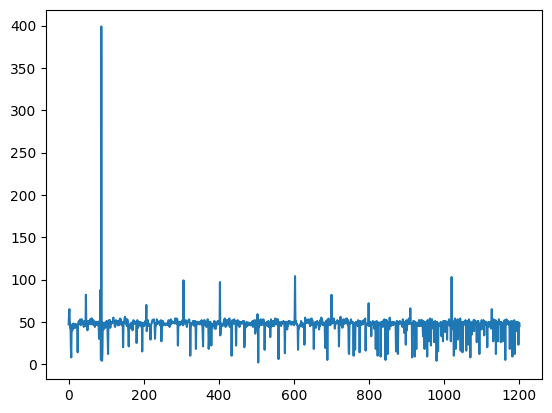

In [67]:
import pandas as pd

pd.Series([len(t) for t in ls_text]).plot()

In [69]:
[t for t in ls_text if len(t)>55]

['Huayang Li~;\x03Yixuan Su\x7f;\x03Deng Cai};\x03Yan Wang|;\x03Lemao Liu|;\x03',
 '~Nara Institute of Science and Technology\x7fUniversity of Cambridge',
 '\x03All authors contributed equally.ﬁrstly present the generic paradigm of retrieval-',
 'augmented generation paradigm, including the re-arXiv:2202.01110v2  [cs.CL]  13 Feb 2022',
 'Sources (Sec. 2.2):Training CorpusExternal DataUnsupervised DataMetrics(Sec. 2.3):Sparse-vector RetrievalDense-vector RetrievalTask-specific RetrievalRetrieval MemoryGeneration ModelSec. 4: Machine TranslationSec. 5: Other TasksData AugmentationAttention MechanismSkeleton & TemplatesInformation RetrievalTasks:Sec. 3: Dialogue GenerationModels (Sec 2.4):OutputFigure 1: The overview of this survey.',
 'pose a cross-lingual retriever to directly retrieve tar-',
 '2018; Bulte and Tezcan, 2019).Attention Mechanisms Another integration',
 'stances. Due to the one-to-many nature, it hap-pens frequently that a retrieved response (extracted',
 'graded largely, 

In [38]:
[t for t in ls_text if is_title(t)]

['1 Introduction',
 '2 Retrieval-Augmented Paradigm',
 '2.1 Formulation',
 '2.3 Retrieval Metrics',
 '2.4 Integration',
 '3 Dialogue Response Generation',
 '4 Machine Translation',
 '4.1 Translation Memory in SMT',
 '4.2 Translation Memory in NMT',
 '5 Other Tasks',
 '6 Future Directions',
 '7 Conclusion',
 '465. Springer.',
 '2019 Conference on Empirical Methods in Natu-',
 '2018. Retrieve, rerank and rewrite: Soft template',
 '2021 Conference of the North American Chapter of',
 '2019. Word position aware translation memory for',
 '2021. Internet-augmented dialogue generation.',
 '2019. Latent retrieval for weakly supervised',
 '1 (Long Papers) , pages 1865–1874. Association for',
 '260.',
 '2012 Joint Conference on Empirical Methods in Nat-',
 '20 November, 2021 , pages 910–917. Association for',
 '2018. Retrieve and reﬁne: Improved sequence gen-',
 '2018 EMNLP Workshop SCAI: The 2nd Interna-',
 '1350.',
 '2020. Neural machine translation with universal',
 '2021 , pages 4234–4241.']

In [ ]:
from rsch_prompts.map_reduce_summary import map_reduce_summary



In [36]:

ARXIV_MAX_QUERY_LENGTH = 300

query = 'SNP'
top_k_results = 20
docs_snp = [
    {"published": result.published.date(),
     "updated": result.updated.date(),
     "entry_id": result.entry_id,
     "Title": result.title,
    f"Authors": [a.name for a in result.authors],
    f"Summary": result.summary}
    for result in arxiv.Search(  # type: ignore
        query[: ARXIV_MAX_QUERY_LENGTH], max_results=top_k_results
    ).results()
]

In [37]:
for d in docs_snp[:4]:
    [print(do) for do in d['Summary'].replace('\n',' ').split('. ')]
    print()

Single-nucleotide polymorphisms (SNPs) account for most variations between human genomes
We show how, if the genomes in a database differ only by a reasonable number of SNPs and the substrings between those SNPs are unique, then we can store a fast compressed suffix array for that database.

Single nucleotide polymorphisms (SNPs) often appear in clusters along the length of a chromosome
This is due to variation in local coalescent times caused by,for example, selection or recombination
Here we investigate whether recombination alone (within a neutral model) can cause statistically significant SNP clustering
We measure the extent of SNP clustering as the ratio between the variance of SNPs found in bins of length $l$, and the mean number of SNPs in such bins, $\sigma^2_l/\mu_l$
For a uniform SNP distribution $\sigma^2_l/\mu_l=1$, for clustered SNPs $\sigma^2_l/\mu_l > 1$
Apart from the bin length, three length scales are important when accounting for SNP clustering: The mean distance bet